## q1) Long term learning dependencies

In this cell loibraries were imported and inputs are generated from torch.zeros and then modeled appropriately to hold 101 dimensions

In [18]:
import torch
from torch import nn
from torch import optim
import matplotlib.pyplot as plt
import random
import numpy as np


inp = torch.zeros(99,101)
j = 0
for i in inp:
    i[j] = 1
    j = j+1


x_pr = torch.zeros(101)
x_pr[99] = 1
y_pr = torch.zeros(101)
y_pr[100] = 1


In this cell models were declared and parameters are taken 
### RNN
Hidden size ---> 120 ,
Batchsize ----> 1 ,
loss -->MSE ,
optimizer ---> adam ,
learning rate --->0.01,
Activation --->relu

### LSTM
Hidden size ---> 120 ,
Batchsize ----> 1 ,
loss -->MSE ,
optimizer ---> adam ,
learning rate --->0.01,
Activation ---> default

In [19]:
rnn = nn.RNN(101,120,1, nonlinearity='relu')
lstm = nn.LSTM(101,120,1)
ln = nn.Linear(120,101)

learning_rate = 0.01
criteria = nn.MSELoss()
optimizer = optim.Adam(rnn.parameters(),lr = learning_rate)
optimizer_lstm = optim.Adam(lstm.parameters(),lr = learning_rate)


In [20]:
def generate_input():
    list_ans = []
    curr_ind = 0
    for i in range(99):
         index = random.randint(curr_ind,len(inp)-1)
         list_ans.append(inp[index])
         curr_ind = index
    return list_ans


In this cell training is done and simulatenoulsy error vs no of samples (for all samples) is plotted

yellow is lstm and blue is rnn

lstm takes less time to converge when considered many sequences(epoch = 1) but when a single sequence is considered(multiple epochs) rnn converges faster

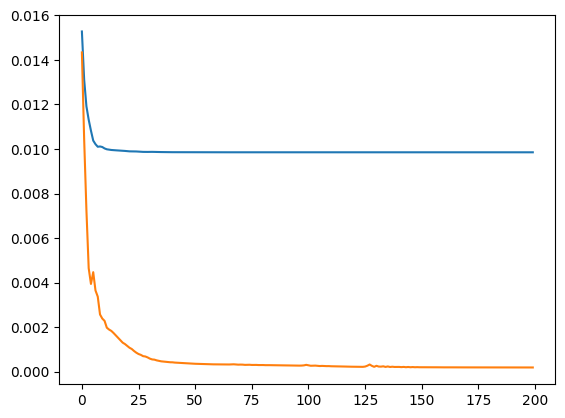

In [21]:
calculate_loss = []
calculate_loss_lstm = []
list_x = []
for i in range(200):
    
    list_x.append(i)
   
    list_ans = generate_input()
    chose_x_y = random.random()
    if(chose_x_y <= 0.5):
     list_med = list_ans
     list_ans.insert(0,x_pr)
     list_med.append(x_pr)
    else:
     list_med = list_ans
     list_ans.insert(0,y_pr)
     list_med.append(y_pr)

    p = torch.stack((list_ans))
    out = torch.stack((list_med))
    z,h= rnn(p)
    z = ln(z)
    loss = criteria(z[99],out[99])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    z_lstm,h_lstm = lstm(p)
    z_lstm = ln(z_lstm)
    loss_lstm = criteria(z_lstm[99],out[99])
    optimizer_lstm.zero_grad()
    loss_lstm.backward()
    optimizer_lstm.step()
   
    calculate_loss.append(loss.item())
    calculate_loss_lstm.append(loss_lstm.item())


plt.plot(list_x,calculate_loss)
plt.plot(list_x,calculate_loss_lstm)
plt.show()

In [22]:
def test_seq_gen():
 test_seq = []
 test_out_seq = []
 for i in range(0,3000):
    test_seq.append(generate_input())
 return test_seq,test_out_seq

Here the plot is error vs no of sequences is plotted (for a single sequence over multiple epochs)

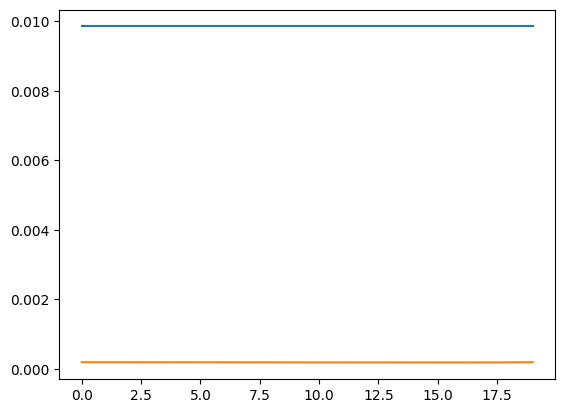

In [23]:
calculate_loss_epoch = []
calculate_loss_lstm_epoch = []
list_x = []
list_ans = generate_input()
chose_x_y = random.random()
if(chose_x_y <= 0.5):
     list_med = list_ans
     list_ans.insert(0,x_pr)
     list_med.append(x_pr)
else:
     list_med = list_ans
     list_ans.insert(0,y_pr)
     list_med.append(y_pr)
p = torch.stack((list_ans))
out = torch.stack((list_med))
for i in range(20):
    list_x.append(i)
   
  
    z,h= rnn(p)
    z = ln(z)
    loss = criteria(z[99],out[99])
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    z_lstm,h_lstm = lstm(p)
    z_lstm = ln(z_lstm)
    loss_lstm = criteria(z_lstm[99],out[99])
    optimizer_lstm.zero_grad()
    loss_lstm.backward()
    optimizer_lstm.step()
   
    calculate_loss_epoch.append(loss.item())
    calculate_loss_lstm_epoch.append(loss_lstm.item())


plt.plot(list_x,calculate_loss_epoch)
plt.plot(list_x,calculate_loss_lstm_epoch)
plt.show()

the average number of wrong predictions on the test set in 10 different trials (for rnn)

In [24]:
list_ans_acc = []
for j in range(10):
  ans = 0
  for i in range(3000):
    #list_x.append(i)
   #for j in range(3000):
    list_ans = generate_input()
    chose_x_y = random.random()
    if(chose_x_y <= 0.5):
     list_med = list_ans
     list_ans.insert(0,x_pr)
     list_med.append(x_pr)
    else:
     list_med = list_ans
     list_ans.insert(0,y_pr)
     list_med.append(y_pr)

    p = torch.stack((list_ans))
    out = torch.stack((list_med))
    z,h= rnn(p)
    z = ln(z)
    if(z[99].argmax()!=out[99].argmax()):
        ans = ans+1
  list_ans_acc.append(((10-ans)/10)*100)

list_ans_acc =np.array(list_ans_acc)
print("Accuracy is ")
np.mean(list_ans_acc)

Accuracy is 


100.0

the average number of wrong predictions on the test set in 10 different trials (lstm)

In [25]:
list_ans_acc = []
for i in range(10):
  ans = 0
  for i in range(3000):
    list_ans = generate_input()
    chose_x_y = random.random()
    if(chose_x_y <= 0.5):
     list_med = list_ans
     list_ans.insert(0,x_pr)
     list_med.append(x_pr)
    else:
     list_med = list_ans
     list_ans.insert(0,y_pr)
     list_med.append(y_pr)

    p = torch.stack((list_ans))
    out = torch.stack((list_med))
    z,h= lstm(p)
    z = ln(z)
    if(z[99].argmax()!=out[99].argmax()):
        ans = ans+1
  list_ans_acc.append(((10-ans)/10)*100)

    

print("Accuracy is ")
list_ans_acc =np.array(list_ans_acc)
np.mean(list_ans_acc)

Accuracy is 


100.0

## q2) Tempoal order

In this methods are initialized

In [26]:
class LSTMMETHOD(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bias=True):
        super(LSTMMETHOD, self).__init__()

        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.lstm = nn.LSTM(input_dim, 2, layer_dim)
        self.lstm2 =nn.LSTM(2,4,layer_dim)
        self.lstm3 = nn.LSTM(4,8,layer_dim)
        self.lstm.weight_ih_l0.data.uniform_(-0.1,0.1)
        self.lstm.bias_ih_l0.data.fill_(-2)
        self.lstm2.weight_ih_l0.data.uniform_(-0.1,0.1)
        self.lstm2.bias_ih_l0.data.fill_(-4)
        self.lstm3.weight_ih_l0.data.uniform_(-0.1,0.1)
        self.lstm3.bias_ih_l0.data.fill_(-6)
        
        
        self.lout = nn.Linear(8, output_dim)
     
    
    
    def forward(self, x,len):
        
        out,j = self.lstm(x) 
        out,j = self.lstm2(out)
        out,j = self.lstm3(out)
        out = self.lout(out)
      
        return out
 
class RNNMETHOD(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, bias=True):
        super(RNNMETHOD, self).__init__()

        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.rnn = nn.RNN(input_dim, 2, layer_dim)
        self.rnn2 =nn.RNN(2,4,layer_dim)
        self.rnn3 = nn.RNN(4,8,layer_dim)
        self.rnn.weight_ih_l0.data.uniform_(-0.1,0.1)
        self.rnn.bias_ih_l0.data.fill_(-2)
        self.rnn2.weight_ih_l0.data.uniform_(-0.1,0.1)
        self.rnn2.bias_ih_l0.data.fill_(-4)
        self.rnn3.weight_ih_l0.data.uniform_(-0.1,0.1)
        self.rnn3.bias_ih_l0.data.fill_(-6)
        
        
        self.lout = nn.Linear(8, output_dim)
     
    
    
    def forward(self, x,len):
        
        out,j = self.rnn(x) 
        out,j = self.rnn2(out)
        out,j = self.rnn3(out)
        out = self.lout(out)
      
        return out
 

Generated inputs 

In [27]:
inp = torch.zeros(8,8)
j = 0
for i in inp:
    i[j] = 1
    j = j+1

inp1 = [inp[1],inp[2],inp[3],inp[4]]

def generate_inp():
 output_rand = []
 intirand = random.randint(100,110)
 initpos1 = random.randint(10,20)
 initpos2 = random.randint(33,43)
 initpos3 = random.randint(66,76)
 list_out_choice = [inp[5],inp[6]]
 list_inp_seq = []
 list_inp_seq.append(inp[0])
 for i in range(intirand-2):
    if(i == initpos1):
        val = random.choice(list_out_choice)
        output_rand.append(val)
        list_inp_seq.append(val)
    elif(i == initpos2):
        val = random.choice(list_out_choice)
        output_rand.append(val)
        list_inp_seq.append(val)
        
    elif(i == initpos3):
       val = random.choice(list_out_choice)
       output_rand.append(val)
       list_inp_seq.append(val)
    else:
        list_inp_seq.append(random.choice(inp1))

 list_inp_seq.append(inp[7])
 return list_inp_seq,output_rand

Matching outputs to one hot vectors

In [28]:
def finstring(output_rand):
    if(torch.equal(output_rand[0],inp[5]) and torch.equal(output_rand[1],inp[5]) and torch.equal(output_rand[2],inp[5])):
        return "Q"
    if(torch.equal(output_rand[0],inp[5]) and torch.equal(output_rand[1],inp[5]) and torch.equal(output_rand[2],inp[6])):
        return "R"
    if(torch.equal(output_rand[0],inp[5]) and torch.equal(output_rand[1],inp[6]) and torch.equal(output_rand[2],inp[5])):
        return "S"
    if(torch.equal(output_rand[0],inp[5]) and torch.equal(output_rand[1],inp[6]) and torch.equal(output_rand[2],inp[6])):
        return "U"
    if(torch.equal(output_rand[0],inp[6]) and torch.equal(output_rand[1],inp[5]) and torch.equal(output_rand[2],inp[5])):
        return "V"
    if(torch.equal(output_rand[0],inp[6]) and torch.equal(output_rand[1],inp[5]) and torch.equal(output_rand[2],inp[6])):
        return "A"
    if(torch.equal(output_rand[0],inp[6]) and torch.equal(output_rand[1],inp[6]) and torch.equal(output_rand[2],inp[5])):
        return "B"
    if(torch.equal(output_rand[0],inp[6]) and torch.equal(output_rand[1],inp[6]) and torch.equal(output_rand[2],inp[6])):
        return "C"
    

train_seq = []
out_seq = []

inp_out = torch.zeros(8,8)
j = 0
for i in inp_out:
    i[j] = 2
    j = j+1
outcheck = inp_out[0]
for i in range(100):
    outinfunc,output_in_rand= generate_inp()
    stringout = finstring(torch.stack(output_in_rand))
    train_seq.append(torch.stack(outinfunc))
    out_seq.append(stringout)




listoutcheck = []
listouttestcheck = []
for i in out_seq:
    if(i == "Q"):
        
        listoutcheck.append(inp_out[0])
    if(i == "R"):
        listoutcheck.append(inp_out[1])
    if(i == "S"):
        listoutcheck.append(inp_out[2])
    if(i == "U"):
        listoutcheck.append(inp_out[3])
    if(i == "V"):
        listoutcheck.append(inp_out[4])
    if(i == "A"):
        listoutcheck.append(inp_out[5])
    if(i == "B"):
        listoutcheck.append(inp_out[6])
    if(i == "C"):
        listoutcheck.append(inp_out[7])


Training and testing

In [29]:
learning_rate = 0.1

model_rnn = RNNMETHOD(8,9, 2, 8)
model = LSTMMETHOD(8,9,2,8)
optimizer_rnn = torch.optim.Adam(model_rnn.parameters(), lr=learning_rate)  
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  
criterion = nn.CrossEntropyLoss()

for j  in range(len(train_seq)):
    for i in range(50):
        optimizer.zero_grad()
        outputs = model(train_seq[j],len(train_seq[j]))
        loss = criterion(outputs[len(train_seq[j])-1], listoutcheck[j])
        loss.backward()
        optimizer.step()


#RNN
for j  in range(len(train_seq)):
    for i in range(50):
        optimizer_rnn.zero_grad()
        outputs = model_rnn(train_seq[j],len(train_seq[j]))
        loss = criterion(outputs[len(train_seq[j])-1], listoutcheck[j])
        loss.backward()
        optimizer_rnn.step()

test_seq_rnn = []
test_out_seq_rnn = []
for i in range(0,50):
    outinfunc,output_in_rand= generate_inp()
    stringout = finstring(torch.stack(output_in_rand))
    test_seq_rnn.append(torch.stack(outinfunc))
    test_out_seq_rnn.append(stringout)

for j in range(len(test_seq)):
    outputs = model_rnn(test_seq[j],len(test_seq[j]))



KeyboardInterrupt: 

Plotting error vs sequence length (for both lstm and rnn)

In [30]:
def calloss(length):
 loss_append = []
 for j in range(length):
    loss_avg = 0
    for i in range(50):
        optimizer.zero_grad()
        
        outputs = model(train_seq[j],len(train_seq[j]))
        loss = criterion(outputs[len(train_seq[j])-1], listoutcheck[j])
        
        loss_avg = loss + loss_avg
        loss.backward()
        optimizer.step()
    loss_append.append(loss_avg/50)
 return loss_append

def calloss_rnn(length):
 loss_append = []
 for j in range(length):
    loss_avg = 0
    for i in range(50):
        optimizer_rnn.zero_grad()
        
        outputs = model(train_seq[j],len(train_seq[j]))
        loss = criterion(outputs[len(train_seq[j])-1], listoutcheck[j])
        
        loss_avg = loss + loss_avg
        loss.backward()
        optimizer_rnn.step()
    loss_append.append(loss_avg/50)
 return loss_append

list_error = []
list_x = []
for i in range(1,10):
    x = torch.stack(calloss(i))
    list_x.append(i)
    print(torch.mean(x).item())
    list_error.append(torch.mean(x).item())

list_error_rnn = []
list_x_rnn = []
for i in range(1,10):
    x = torch.stack(calloss_rnn(i))
    list_x_rnn.append(i)
    print(torch.mean(x).item())
    list_error_rnn.append(torch.mean(x).item())


5.325512886047363
2.510343313217163
3.003962755203247
1.812063217163086
1.9983361959457397
1.8734594583511353
3.0986735820770264
3.481950044631958


KeyboardInterrupt: 

Plotting the outputs (red for lstm)

In [ ]:
plt.plot(list_x,list_error,color = 'red')
plt.plot(list_x_rnn,list_error_rnn)
plt.show()


Generating 3000 test sequences

In [ ]:
def test_seq_gen():
 test_seq = []
 test_out_seq = []
 for i in range(0,3000):
    outinfunc,output_in_rand= generate_inp()
    stringout = finstring(torch.stack(output_in_rand))
    test_seq.append(torch.stack(outinfunc))
    test_out_seq.append(stringout)
 return test_seq,test_out_seq


In [ ]:
for j in range(10):
 test_seq = []
 test_out_seq = []
 for i in range(3000):
    outinfunc,output_in_rand= generate_inp()
    stringout = finstring(torch.stack(output_in_rand))
    test_seq.append(torch.stack(outinfunc))
    test_out_seq.append(stringout)

 for j in range(len(test_seq)):
    outputs = model(test_seq[j],len(test_seq[j]))
    
